<a href="https://colab.research.google.com/github/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Code at https://github.com/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [1]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Downloading GitHub Data set 

In [2]:
#! git clone https://github.com/CSSEGISandData/COVID-19.git

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [3]:

### Select data path
#fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

fullpath1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df1 = pd.read_csv(fullpath1, error_bad_lines=False)

#fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
fullpath2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

# Part 2. Explore USA time series by counties

In [4]:
df1.shape

(3342, 655)

In [5]:
df2.shape

(279, 648)

view the dataframe

In [6]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9439,9493,9511,9527,9546,9568,9611,9642,9652,9667,9691,9703,9715,9744,9761,9777,9780,9790,9799,9810,9826,9839,9843,9850,9851,9858,9865,9874,9883,9893,9901,9904,9909,9910,9954,9967,10043,10047,10048,10061
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35619,35707,35750,35814,35886,35946,36054,36108,36201,36242,36278,36352,36409,36447,36491,36542,36579,36602,36697,36734,36780,36814,36870,36889,36905,36933,36965,37018,37044,37069,37087,37098,37127,37167,37192,37224,37245,37258,37266,37285
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3370,3389,3398,3403,3416,3419,3429,3432,3465,3472,3474,3481,3483,3490,3495,3512,3519,3521,3524,3527,3536,3541,3545,3546,3546,3548,3550,3552,3553,3554,3556,3560,3563,3565,3566,3575,3577,3578,3578,3583
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3947,3961,3969,3979,3997,4016,4056,4073,4085,4093,4102,4112,4126,4131,4146,4153,4157,4163,4167,4168,4176,4184,4192,4193,4194,4202,4208,4211,4216,4216,4217,4217,4232,4236,4240,4246,4251,4252,4253,4256
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9357,9418,9452,9481,9522,9555,9595,9649,9693,9720,9735,9774,9797,9818,9842,9860,9870,9878,9923,9941,9957,9970,9998,10013,10020,10037,10047,10071,10081,10094,10102,10104,10113,10132,10162,10179,10192,10197,10207,10227


How to find out the columns?

In [7]:
# dir(df1)

In [8]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '10/17/21', '10/18/21', '10/19/21', '10/20/21', '10/21/21', '10/22/21',
       '10/23/21', '10/24/21', '10/25/21', '10/26/21'],
      dtype='object', length=655)

In [9]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4743,4743,4743,4804,4819,4851,4870,4883,4883,4883,4899,4915,4926,4941,4943,4943,4943,4953,4956,4960,4973,4984,4984,4984,5000,5006,5018,5039,5050,5050,5050,5075,5083,5098,5110,5119,5119,5119,5152,5164
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3326,3326,3326,3350,3371,3393,3407,3422,3422,3422,3473,3484,3496,3520,3550,3550,3550,3578,3602,3628,3642,3660,3660,3660,3674,3689,3702,3705,3711,3711,3711,3719,3733,3744,3756,3781,3781,3781,3794,3805
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1173,1173,1173,1187,1204,1223,1248,1267,1267,1267,1283,1310,1335,1368,1398,1398,1398,1422,1439,1447,1470,1486,1486,1486,1522,1546,1559,1575,1586,1586,1586,1603,1631,1645,1657,1677,1677,1677,1690,1700
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,854,854,854,862,863,863,871,881,881,881,891,894,900,904,910,910,910,920,925,926,944,947,947,947,957,966,970,978,986,986,986,1002,1004,1006,1022,1027,1027,1027,1041,1047


In [10]:
df1['Admin2'][3337:3339]

3337    Teton
3338    Uinta
Name: Admin2, dtype: object

In [11]:
df1.iloc[3337:3340, 4:7] #be aware that Python is typically end-exclusive! 

,FIPS,Admin2,Province_State
3337,56039.0,Teton,Wyoming
3338,56041.0,Uinta,Wyoming
3339,90056.0,Unassigned,Wyoming


How to find out dataframe dimensions

In [12]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3342, 655)


How many "province states" are there in this data set?

In [13]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [15]:
df1.iloc[:, 11:].max().max()

1486614

In [16]:
df1.idxmax

<bound method DataFrame.idxmax of            UID iso2 iso3  code3  ...  10/23/21 10/24/21 10/25/21 10/26/21
0     84001001   US  USA    840  ...     10043    10047    10048    10061
1     84001003   US  USA    840  ...     37245    37258    37266    37285
2     84001005   US  USA    840  ...      3577     3578     3578     3583
3     84001007   US  USA    840  ...      4251     4252     4253     4256
4     84001009   US  USA    840  ...     10192    10197    10207    10227
...        ...  ...  ...    ...  ...       ...      ...      ...      ...
3337  84056039   US  USA    840  ...      5119     5119     5152     5164
3338  84056041   US  USA    840  ...      3781     3781     3794     3805
3339  84090056   US  USA    840  ...         0        0        0        0
3340  84056043   US  USA    840  ...      1677     1677     1690     1700
3341  84056045   US  USA    840  ...      1027     1027     1041     1047

[3342 rows x 655 columns]>

Find out the largest value for column '10/20/21'

In [17]:
df1["10/20/21"].max()

1480656

## Find out which row has the largest value. 

In [18]:
df1.loc[df1['10/20/21']==1480656]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
215,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,"Los Angeles, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1440721,1442808,1444127,1445121,1446348,1448065,1449923,1451438,1452998,1454172,1455155,1456275,1457672,1459182,1460645,1462013,1463039,1463889,1464793,1466248,1467450,1468634,1469790,1470829,1471645,1472419,1473410,1473410,1475694,1475694,1476791,1477686,1479421,1480656,1481814,1483031,1484192,1485105,1485769,1486614


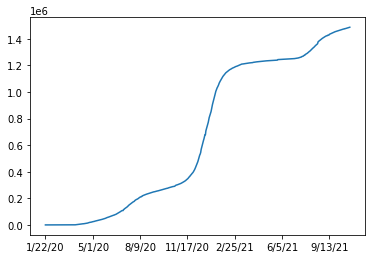

In [19]:
LA = df1.iloc[215, 11:]
type(LA)
#print(LA)
LA.plot()

## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

In [20]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

,0,1,2
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
10/22/21,9967,37224,3575
10/23/21,10043,37245,3577
10/24/21,10047,37258,3578
10/25/21,10048,37266,3578


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf926fc5d0>,
      dtype=object)

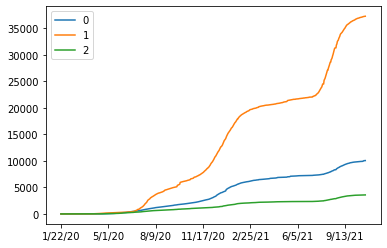

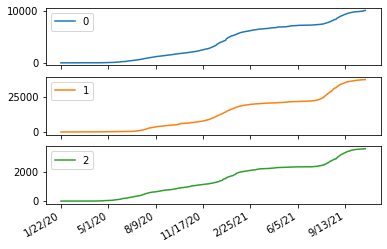

In [21]:
UScases.plot()
UScases.plot(subplots=True)

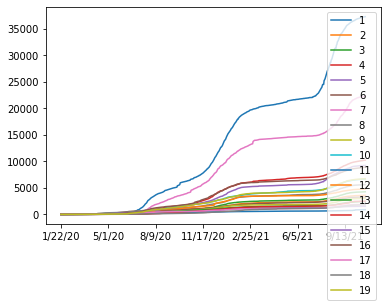

In [22]:
df1.iloc[1:20, 11:].transpose().plot()


## Add meaningful index to the dataframe

In [23]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3342)

In [24]:
df1.shape

(3342, 654)

In [25]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9439,9493,9511,9527,9546,9568,9611,9642,9652,9667,9691,9703,9715,9744,9761,9777,9780,9790,9799,9810,9826,9839,9843,9850,9851,9858,9865,9874,9883,9893,9901,9904,9909,9910,9954,9967,10043,10047,10048,10061
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35619,35707,35750,35814,35886,35946,36054,36108,36201,36242,36278,36352,36409,36447,36491,36542,36579,36602,36697,36734,36780,36814,36870,36889,36905,36933,36965,37018,37044,37069,37087,37098,37127,37167,37192,37224,37245,37258,37266,37285
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3370,3389,3398,3403,3416,3419,3429,3432,3465,3472,3474,3481,3483,3490,3495,3512,3519,3521,3524,3527,3536,3541,3545,3546,3546,3548,3550,3552,3553,3554,3556,3560,3563,3565,3566,3575,3577,3578,3578,3583
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3947,3961,3969,3979,3997,4016,4056,4073,4085,4093,4102,4112,4126,4131,4146,4153,4157,4163,4167,4168,4176,4184,4192,4193,4194,4202,4208,4211,4216,4216,4217,4217,4232,4236,4240,4246,4251,4252,4253,4256
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9357,9418,9452,9481,9522,9555,9595,9649,9693,9720,9735,9774,9797,9818,9842,9860,9870,9878,9923,9941,9957,9970,9998,10013,10020,10037,10047,10071,10081,10094,10102,10104,10113,10132,10162,10179,10192,10197,10207,10227


In [26]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

(3342, 655)

In [27]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9439,9493,9511,9527,9546,9568,9611,9642,9652,9667,9691,9703,9715,9744,9761,9777,9780,9790,9799,9810,9826,9839,9843,9850,9851,9858,9865,9874,9883,9893,9901,9904,9909,9910,9954,9967,10043,10047,10048,10061
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35619,35707,35750,35814,35886,35946,36054,36108,36201,36242,36278,36352,36409,36447,36491,36542,36579,36602,36697,36734,36780,36814,36870,36889,36905,36933,36965,37018,37044,37069,37087,37098,37127,37167,37192,37224,37245,37258,37266,37285
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3370,3389,3398,3403,3416,3419,3429,3432,3465,3472,3474,3481,3483,3490,3495,3512,3519,3521,3524,3527,3536,3541,3545,3546,3546,3548,3550,3552,3553,3554,3556,3560,3563,3565,3566,3575,3577,3578,3578,3583
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3947,3961,3969,3979,3997,4016,4056,4073,4085,4093,4102,4112,4126,4131,4146,4153,4157,4163,4167,4168,4176,4184,4192,4193,4194,4202,4208,4211,4216,4216,4217,4217,4232,4236,4240,4246,4251,4252,4253,4256
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9357,9418,9452,9481,9522,9555,9595,9649,9693,9720,9735,9774,9797,9818,9842,9860,9870,9878,9923,9941,9957,9970,9998,10013,10020,10037,10047,10071,10081,10094,10102,10104,10113,10132,10162,10179,10192,10197,10207,10227


In [28]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

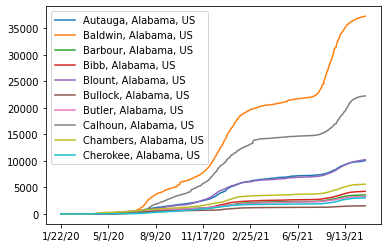

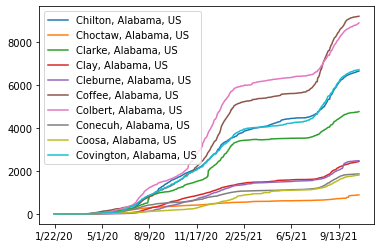

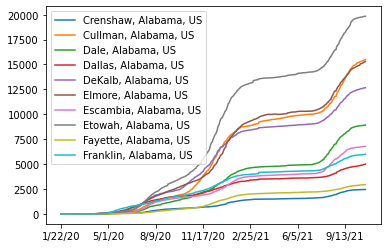

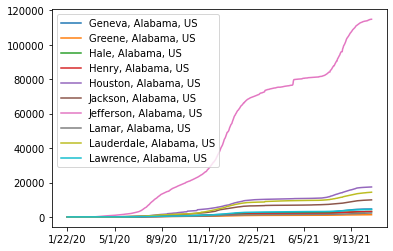

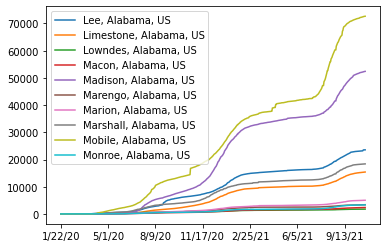

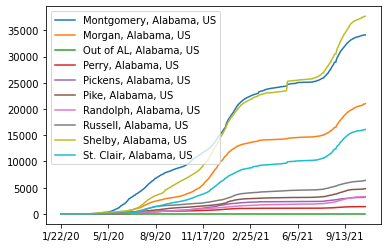

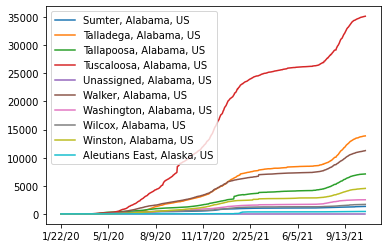

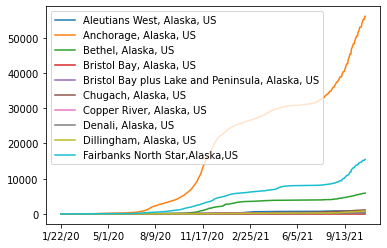

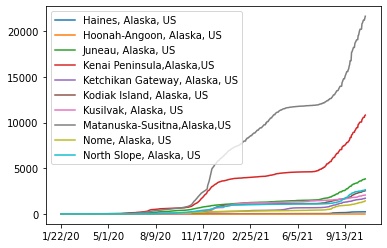

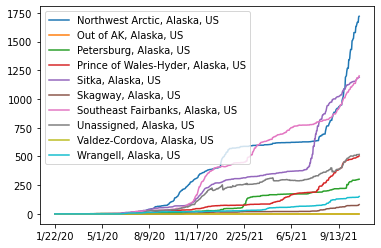

In [29]:
step = 10
for i in range(0, 100, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

In [30]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4743,4743,4743,4804,4819,4851,4870,4883,4883,4883,4899,4915,4926,4941,4943,4943,4943,4953,4956,4960,4973,4984,4984,4984,5000,5006,5018,5039,5050,5050,5050,5075,5083,5098,5110,5119,5119,5119,5152,5164
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3326,3326,3326,3350,3371,3393,3407,3422,3422,3422,3473,3484,3496,3520,3550,3550,3550,3578,3602,3628,3642,3660,3660,3660,3674,3689,3702,3705,3711,3711,3711,3719,3733,3744,3756,3781,3781,3781,3794,3805
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1173,1173,1173,1187,1204,1223,1248,1267,1267,1267,1283,1310,1335,1368,1398,1398,1398,1422,1439,1447,1470,1486,1486,1486,1522,1546,1559,1575,1586,1586,1586,1603,1631,1645,1657,1677,1677,1677,1690,1700
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,854,854,854,862,863,863,871,881,881,881,891,894,900,904,910,910,910,920,925,926,944,947,947,947,957,966,970,978,986,986,986,1002,1004,1006,1022,1027,1027,1027,1041,1047


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

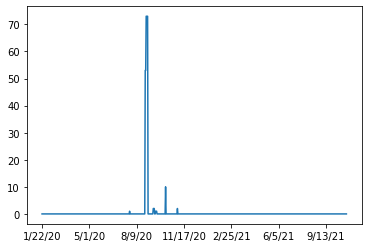

In [31]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [32]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape
df1.loc[ df1.index.str.contains('Unassigned'), ].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,"Unassigned, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,"Unassigned, Alaska, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,402,402,402,408,421,428,443,453,453,453,464,464,474,479,485,485,485,490,495,497,501,504,504,504,503,503,503,504,510,510,510,510,508,507,516,516,516,516,517,518
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,"Unassigned, Arizona, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,"Unassigned, Arkansas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5155,5197,5244,5236,5311,5409,5430,5514,5622,5620,5647,5640,5537,5506,6363,5116,5123,5119,5097,5111,5111,5092,5114,5100,5108,5104,5107,5105,5109,5113,5105,5105,5116,5136,5139,5150,5154,5152,5145,5140
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,"Unassigned, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,117,101,118,165,212,114,88,137,137,137,143,165,95,124,116,116,116,152,193,108,110,133,133,133,153,194,102,148,186,186,186,182,212,226,182,146,146,146,146,250


In [33]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [34]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [35]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [36]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

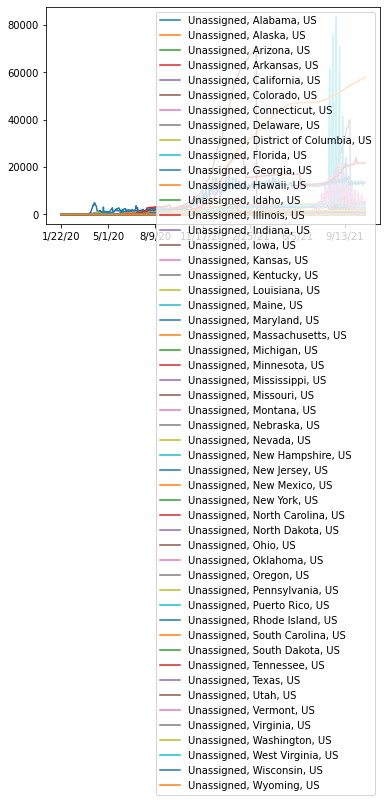

In [37]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

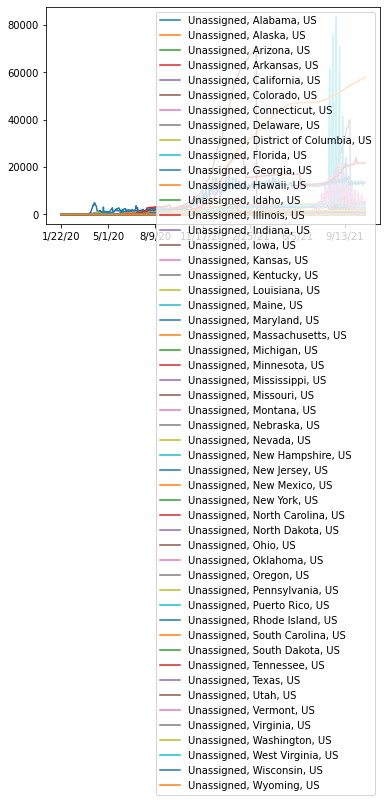

In [38]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, a single line solution! 

## How about the cases at the Hamilton county, TN? 

In [39]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59084,59084,59084,59524,59524,59996,60180,60405,60405,60405,60720,60855,60983,61144,61261,61261,61261,61522,61642,61755,61858,62034,62034,62034,62260,62376,62525,62642,62765,62765,62765,62920,63005,63120,63208,63287,63287,63287,63287,63476


In [40]:
dfHamilton = df1[df1.Combined_Key == "Hamilton, Tennessee, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59084,59084,59084,59524,59524,59996,60180,60405,60405,60405,60720,60855,60983,61144,61261,61261,61261,61522,61642,61755,61858,62034,62034,62034,62260,62376,62525,62642,62765,62765,62765,62920,63005,63120,63208,63287,63287,63287,63287,63476


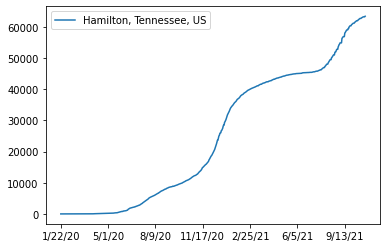

In [41]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

#Part 3. Examine the cases in each state.

In [42]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3342, dtype: object

In [43]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [44]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [45]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,764839,768301,770391,772311,775531,778549,781915,784484,787421,789054,790648,792632,794773,796475,798320,799800,800692,801428,802977,804249,805511,806560,807479,808132,808599,809485,810501,811551,812694,813481,814025,814363,815324,815989,817054,818652,819597,820011,820312,821255
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,100360,100360,100360,102471,103327,104574,105893,107679,107679,107679,111692,112391,113392,114665,115703,115703,115703,117941,118793,119659,120514,121348,121348,121348,124123,124579,125803,126783,127767,127767,127767,127767,130590,131403,132424,133272,133272,133272,134952,135696
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1061604,1064346,1066803,1068823,1070757,1072863,1075876,1078874,1081790,1084369,1086328,1087451,1090839,1093583,1097225,1100167,1102422,1104535,1106789,1108830,1111359,1114061,1116419,1118601,1120361,1122390,1124709,1127095,1129494,1131976,1131976,1131976,1137636,1139627,1142122,1145196,1148340,1149824,1149982,1150432
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,482743,484317,485056,485452,486853,488316,489856,491221,492233,492650,493120,493920,495073,496077,496934,497576,498062,498257,499004,499886,500779,501518,502405,502806,503089,503822,504516,505297,506011,506573,506956,507098,507759,508431,508937,509559,509999,510245,510406,510908


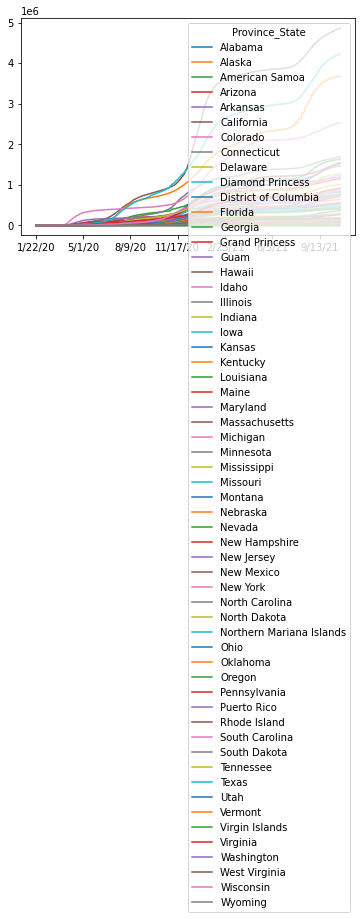

In [46]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf8fd99190>,
      dtype=object)

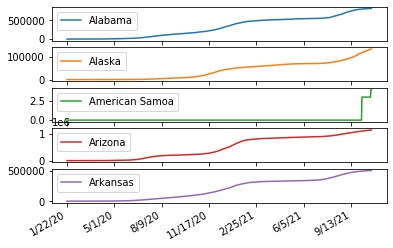

In [47]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf92c06790>],
      dtype=object)

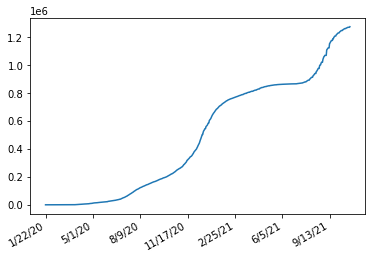

In [48]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [49]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,764839,768301,770391,772311,775531,778549,781915,784484,787421,789054,790648,792632,794773,796475,798320,799800,800692,801428,802977,804249,805511,806560,807479,808132,808599,809485,810501,811551,812694,813481,814025,814363,815324,815989,817054,818652,819597,820011,820312,821255
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,100360,100360,100360,102471,103327,104574,105893,107679,107679,107679,111692,112391,113392,114665,115703,115703,115703,117941,118793,119659,120514,121348,121348,121348,124123,124579,125803,126783,127767,127767,127767,127767,130590,131403,132424,133272,133272,133272,134952,135696
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1061604,1064346,1066803,1068823,1070757,1072863,1075876,1078874,1081790,1084369,1086328,1087451,1090839,1093583,1097225,1100167,1102422,1104535,1106789,1108830,1111359,1114061,1116419,1118601,1120361,1122390,1124709,1127095,1129494,1131976,1131976,1131976,1137636,1139627,1142122,1145196,1148340,1149824,1149982,1150432
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,482743,484317,485056,485452,486853,488316,489856,491221,492233,492650,493120,493920,495073,496077,496934,497576,498062,498257,499004,499886,500779,501518,502405,502806,503089,503822,504516,505297,506011,506573,506956,507098,507759,508431,508937,509559,509999,510245,510406,510908


In [50]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

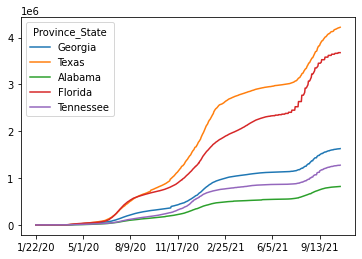

In [51]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

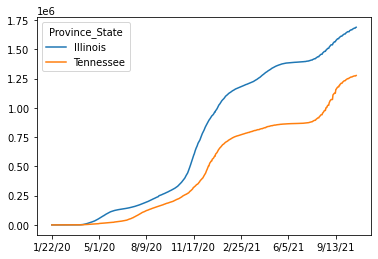

In [52]:
df_by_state.transpose()[['Illinois', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

## How to examine the new cases daily? 

### diff() on a test dataframe

In [53]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [54]:
df_test.diff(axis=0) #by row

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,8.0,8.0,8.0,10.0
2,10.0,10.0,10.0,8.0
3,8.0,8.0,8.0,8.0


In [55]:
df_test.diff(axis=1) #by column

,A,B,C,D
0,NaN,2.0,2.0,2.0
1,NaN,2.0,2.0,4.0
2,NaN,2.0,2.0,2.0
3,NaN,2.0,2.0,2.0


### diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [56]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,764839,768301,770391,772311,775531,778549,781915,784484,787421,789054,790648,792632,794773,796475,798320,799800,800692,801428,802977,804249,805511,806560,807479,808132,808599,809485,810501,811551,812694,813481,814025,814363,815324,815989,817054,818652,819597,820011,820312,821255
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,100360,100360,100360,102471,103327,104574,105893,107679,107679,107679,111692,112391,113392,114665,115703,115703,115703,117941,118793,119659,120514,121348,121348,121348,124123,124579,125803,126783,127767,127767,127767,127767,130590,131403,132424,133272,133272,133272,134952,135696
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1061604,1064346,1066803,1068823,1070757,1072863,1075876,1078874,1081790,1084369,1086328,1087451,1090839,1093583,1097225,1100167,1102422,1104535,1106789,1108830,1111359,1114061,1116419,1118601,1120361,1122390,1124709,1127095,1129494,1131976,1131976,1131976,1137636,1139627,1142122,1145196,1148340,1149824,1149982,1150432
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,482743,484317,485056,485452,486853,488316,489856,491221,492233,492650,493120,493920,495073,496077,496934,497576,498062,498257,499004,499886,500779,501518,502405,502806,503089,503822,504516,505297,506011,506573,506956,507098,507759,508431,508937,509559,509999,510245,510406,510908


In [57]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2974.0,3462.0,2090.0,1920.0,3220.0,3018.0,3366.0,2569.0,2937.0,1633.0,1594.0,1984.0,2141.0,1702.0,1845.0,1480.0,892.0,736.0,1549.0,1272.0,1262.0,1049.0,919.0,653.0,467.0,886.0,1016.0,1050.0,1143.0,787.0,544.0,338.0,961.0,665.0,1065.0,1598.0,945.0,414.0,301.0,943.0
Alaska,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,888.0,0.0,0.0,2111.0,856.0,1247.0,1319.0,1786.0,0.0,0.0,4013.0,699.0,1001.0,1273.0,1038.0,0.0,0.0,2238.0,852.0,866.0,855.0,834.0,0.0,0.0,2775.0,456.0,1224.0,980.0,984.0,0.0,0.0,0.0,2823.0,813.0,1021.0,848.0,0.0,0.0,1680.0,744.0
American Samoa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Arizona,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2830.0,2742.0,2457.0,2020.0,1934.0,2106.0,3013.0,2998.0,2916.0,2579.0,1959.0,1123.0,3388.0,2744.0,3642.0,2942.0,2255.0,2113.0,2254.0,2041.0,2529.0,2702.0,2358.0,2182.0,1760.0,2029.0,2319.0,2386.0,2399.0,2482.0,0.0,0.0,5660.0,1991.0,2495.0,3074.0,3144.0,1484.0,158.0,450.0
Arkansas,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1809.0,1574.0,739.0,396.0,1401.0,1463.0,1540.0,1365.0,1012.0,417.0,470.0,800.0,1153.0,1004.0,857.0,642.0,486.0,195.0,747.0,882.0,893.0,739.0,887.0,401.0,283.0,733.0,694.0,781.0,714.0,562.0,383.0,142.0,661.0,672.0,506.0,622.0,440.0,246.0,161.0,502.0


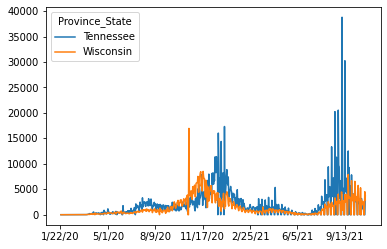

In [58]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [59]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,NaN,NaN
1/24/20,NaN,NaN
1/25/20,0.000000,0.000000
1/26/20,0.000000,0.000000
...,...,...
10/22/21,1731.666667,894.000000
10/23/21,1089.666667,623.000000
10/24/21,560.666667,282.666667
10/25/21,0.000000,560.000000


In [61]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


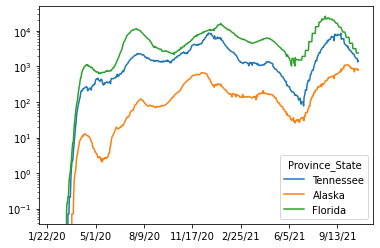

In [62]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf91d95ed0>,
      dtype=object)

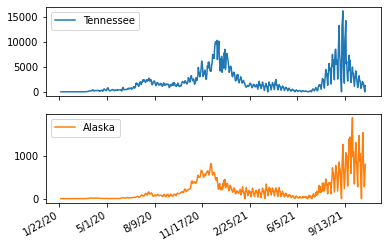

In [63]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

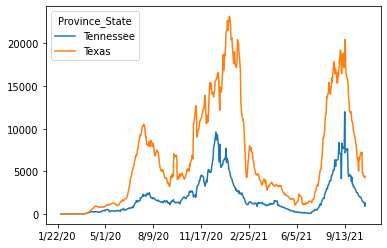

In [64]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [65]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State,Tennessee,Texas
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


## Examine the daily confirmed cases in Hamilton County, TN

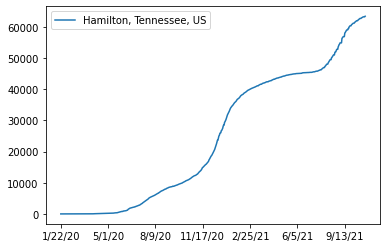

In [66]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [67]:
df_Hamilton = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:]

type(df_Hamilton)
df_Hamilton.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59084,59084,59084,59524,59524,59996,60180,60405,60405,60405,60720,60855,60983,61144,61261,61261,61261,61522,61642,61755,61858,62034,62034,62034,62260,62376,62525,62642,62765,62765,62765,62920,63005,63120,63208,63287,63287,63287,63287,63476


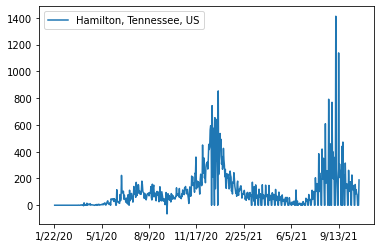

In [68]:
df_Hamilton.transpose().diff(axis=0).plot()

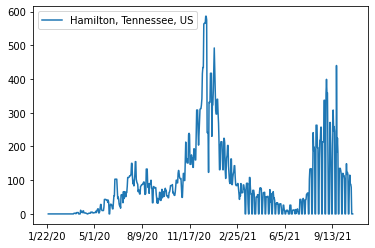

In [69]:
df_Hamilton.transpose().diff(axis=0).rolling(window=3).median().plot()

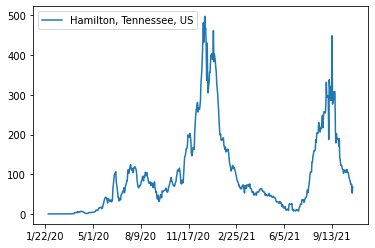

In [70]:
df_Hamilton.transpose().diff(axis=0).rolling(window=7).mean().plot()

## Pick a time window using datetime

In [71]:
#from datetime import datetime 

df_dailycases_by_state2 = df_dailycases_by_state.transpose()

df_dailycases_by_state2.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### convert row index to datetime

In [72]:
df_dailycases_by_state2.index = pd.to_datetime(df_dailycases_by_state2.index)
df_dailycases_by_state2.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
               '2021-10-25', '2021-10-26'],
              dtype='datetime64[ns]', length=644, freq=None)

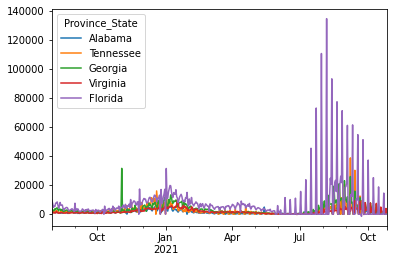

In [73]:
df_dailycases_by_state2.loc['2020-08-01':, ['Alabama', 'Tennessee', 'Georgia', 'Virginia', 'Florida']].plot()


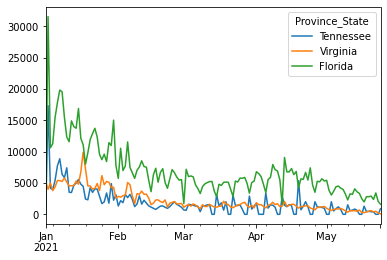

In [74]:

df_dailycases_by_state2.loc['2021-01-01':'2021-05-24', ['Tennessee',  'Virginia', 'Florida']].plot()

## Examine the row with the largest value on 9/8/2020

In [75]:
subset = df1.loc[df1['9/8/20']==249241]

In [76]:
subset = subset.transpose()
subset = subset.iloc[:][11:]
type(subset)

pandas.core.frame.DataFrame

In [77]:
type(subset)

pandas.core.frame.DataFrame

In [78]:
from datetime import datetime

#datetime.strptime( '9/8/20', '%m/%d/%y') 

dates = [datetime.strptime( x, '%m/%d/%y') for x in subset.columns[11:]]
print(dates)

[]


In [79]:
df1.iloc[5:10, -20:-1 ]

,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21
"Bullock, Alabama, US",1511,1511,1511,1512,1514,1517,1517,1517,1517,1517,1517,1517,1517,1516,1516,1516,1516,1517,1517
"Butler, Alabama, US",3221,3227,3228,3228,3228,3230,3233,3236,3239,3247,3248,3248,3250,3253,3256,3258,3263,3264,3267
"Calhoun, Alabama, US",21886,21924,21950,22004,22011,22034,22065,22095,22125,22142,22159,22168,22180,22190,22205,22221,22225,22232,22236
"Chambers, Alabama, US",5520,5523,5524,5531,5532,5537,5541,5553,5558,5559,5560,5562,5562,5563,5567,5607,5607,5610,5612
"Cherokee, Alabama, US",2965,2968,2971,2973,2977,2980,2990,2992,2994,2999,3000,3005,3009,3016,3017,3023,3028,3028,3029


#Part 4 Explore Global Data set

In [80]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/17/21', '10/18/21', '10/19/21', '10/20/21', '10/21/21', '10/22/21',
       '10/23/21', '10/24/21', '10/25/21', '10/26/21'],
      dtype='object', length=648)

In [81]:
df2['Country/Region']
list(df2['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [82]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  195
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'

In [83]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [84]:
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2877,0,0,0,...,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [85]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [86]:
### Check if the dataframe contains NaN values
df2by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2877,0,0,0,...,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [87]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

Index(['US'], dtype='object', name='Country/Region')

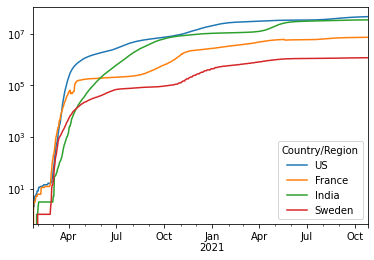

In [88]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


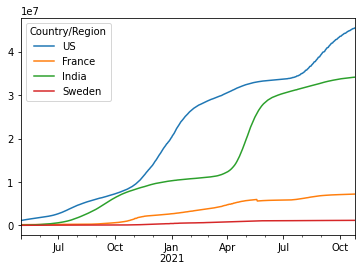

In [89]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [90]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [91]:
df.head

<bound method NDFrame.head of            UID iso2 iso3  code3  ...  10/23/21 10/24/21 10/25/21 10/26/21
0     84001001   US  USA    840  ...     10043    10047    10048    10061
1     84001003   US  USA    840  ...     37245    37258    37266    37285
2     84001005   US  USA    840  ...      3577     3578     3578     3583
3     84001007   US  USA    840  ...      4251     4252     4253     4256
4     84001009   US  USA    840  ...     10192    10197    10207    10227
...        ...  ...  ...    ...  ...       ...      ...      ...      ...
3337  84056039   US  USA    840  ...      5119     5119     5152     5164
3338  84056041   US  USA    840  ...      3781     3781     3794     3805
3339  84090056   US  USA    840  ...         0        0        0        0
3340  84056043   US  USA    840  ...      1677     1677     1690     1700
3341  84056045   US  USA    840  ...      1027     1027     1041     1047

[3342 rows x 655 columns]>

In [92]:
? pd.read_csv()

In [93]:
df2 = pd.read_csv(url, skiprows=5)
df2.head

<bound method NDFrame.head of       84001009  US  USA  840   1009.0  ...  10179  10192  10197  10207  10227
0     84001011  US  USA  840   1011.0  ...   1516   1516   1517   1517   1518
1     84001013  US  USA  840   1013.0  ...   3258   3263   3264   3267   3285
2     84001015  US  USA  840   1015.0  ...  22221  22225  22232  22236  22255
3     84001017  US  USA  840   1017.0  ...   5607   5607   5610   5612   5615
4     84001019  US  USA  840   1019.0  ...   3023   3028   3028   3029   3032
...        ...  ..  ...  ...      ...  ...    ...    ...    ...    ...    ...
3332  84056039  US  USA  840  56039.0  ...   5119   5119   5119   5152   5164
3333  84056041  US  USA  840  56041.0  ...   3781   3781   3781   3794   3805
3334  84090056  US  USA  840  90056.0  ...      0      0      0      0      0
3335  84056043  US  USA  840  56043.0  ...   1677   1677   1677   1690   1700
3336  84056045  US  USA  840  56045.0  ...   1027   1027   1027   1041   1047

[3337 rows x 655 columns]>

#Part 5. In progress Load Google Mobility data set

In [94]:
#? not working, this site is down.# 
#urlGoogleMobility = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
#df.GM = pd.read_csv(urlGoogleMobility )

In [95]:
! wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip 

--2021-10-27 19:35:02--  https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip
Resolving www.gstatic.com (www.gstatic.com)... 142.250.68.67, 2607:f8b0:4007:810::2003
Connecting to www.gstatic.com (www.gstatic.com)|142.250.68.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62107485 (59M) [application/zip]
Saving to: ‘Region_Mobility_Report_CSVs.zip.1’

Region_Mobility_Rep 100%[===================>]  59.23M  17.7MB/s    in 3.4s    

2021-10-27 19:35:05 (17.7 MB/s) - ‘Region_Mobility_Report_CSVs.zip.1’ saved [62107485/62107485]



In [96]:
! unzip /content/Region_Mobility_Report_CSVs.zip

Archive:  /content/Region_Mobility_Report_CSVs.zip
replace 2020_AE_Region_Mobility_Report.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [97]:
! ls *US*csv

2020_US_Region_Mobility_Report.csv  2021_US_Region_Mobility_Report.csv


In [98]:
df_US20 = pd.read_csv( "2020_US_Region_Mobility_Report.csv")
df_US21 = pd.read_csv( "2021_US_Region_Mobility_Report.csv")

In [99]:
df_US = pd.concat( [df_US20, df_US21] )
df_US.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [100]:
df_US.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
773878,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2021-10-18,NaN,NaN,NaN,NaN,-19.0,NaN
773879,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2021-10-19,NaN,NaN,NaN,NaN,-14.0,NaN
773880,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2021-10-20,NaN,NaN,NaN,NaN,-24.0,NaN
773881,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2021-10-21,NaN,NaN,NaN,NaN,-20.0,NaN
773882,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2021-10-22,NaN,NaN,NaN,NaN,-16.0,NaN


In [101]:
df_US.index = pd.to_datetime(df_US.date)
df_US.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22'],
              dtype='datetime64[ns]', name='date', length=1585948, freq=None)

In [102]:
#df_US.loc[ df_US.sub_region_1=='Tennessee'  ]

df_Hamilton_GM = df_US.loc[ ( df_US.sub_region_1=='Tennessee' ) & (df_US.sub_region_2=='Hamilton County') ]
df_Hamilton_GM.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,
2021-10-20,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-20,-4.0,10.0,66.0,-47.0,-25.0,5.0
2021-10-21,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-21,-6.0,5.0,33.0,-47.0,-25.0,6.0
2021-10-22,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-22,-5.0,2.0,56.0,-41.0,-26.0,4.0
2021-10-23,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-23,-4.0,12.0,99.0,-38.0,-18.0,-1.0
2021-10-24,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-24,-5.0,4.0,37.0,-56.0,-18.0,1.0


In [103]:
df_Hamilton_COVID = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().diff(axis=0).rolling(window=7).mean()

type(df_Hamilton_COVID)
df_Hamilton_COVID.tail()

,"Hamilton, Tennessee, US"
10/22/21,74.571429
10/23/21,74.571429
10/24/21,74.571429
10/25/21,52.428571
10/26/21,67.285714


In [112]:
df_Hamilton_COVID.index = pd.to_datetime(df_Hamilton_COVID.index)
df_Hamilton_COVID.rename(columns={"Hamilton, Tennessee, US":"daily_cases"}, inplace=True)
df_Hamilton_COVID.tail()

,daily_cases
2021-10-22,74.571429
2021-10-23,74.571429
2021-10-24,74.571429
2021-10-25,52.428571
2021-10-26,67.285714


In [113]:
df_Hamilton = pd.merge(df_Hamilton_COVID, df_Hamilton_GM, left_index=True, right_index=True)
df_Hamilton.tail()

,daily_cases,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2021-10-20,85.000000,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-20,-4.0,10.0,66.0,-47.0,-25.0,5.0
2021-10-21,80.857143,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-21,-6.0,5.0,33.0,-47.0,-25.0,6.0
2021-10-22,74.571429,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-22,-5.0,2.0,56.0,-41.0,-26.0,4.0
2021-10-23,74.571429,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-23,-4.0,12.0,99.0,-38.0,-18.0,-1.0
2021-10-24,74.571429,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2021-10-24,-5.0,4.0,37.0,-56.0,-18.0,1.0


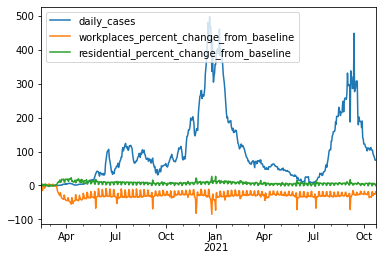

In [114]:
df_Hamilton[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot()